# Overall description of the notebook

Purpose: The purpose of this project is to analyze Instacart's data, clean and prepare it, and extract insights to improve operations and customer experience by understanding customer behavior and product popularity.

**0. Data Source and Preparation:**

* The project involves working with data from Instacart, a grocery delivery platform.
* The dataset has been publicly released by Instacart for a Kaggle competition in 2017.
* Loading data and Verifying and fixing data types.

**1-2. Data Preprocessing:**

* Identifying and handling missing values.
* Identifying and removing duplicate values.

**3. Analysis:**

   In the analysis phase, there are both easy and medium tasks:

* *Easy tasks* include verifying the sensibility of 'order_hour_of_day' and 'order_dow' columns and creating relevant plots.
* *Medium tasks* involve comparing the distribution of 'order_hour_of_day' on Wednesdays and Saturdays, plotting the distribution of the number of orders placed by customers, and identifying the top 20 frequently ordered products.
* *Hard tasks* include more complex analyses:
    * Determining the typical number of items people buy in one order and examining the distribution.
    * Identifying the top 20 items that are reordered most frequently.
    * Calculating the proportion of product orders that are reorders.
    * Calculating the proportion of reordered products for each customer.
    * Finding the top 20 items that people add to their carts first.

In [84]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [85]:
# download raw order data with ";" as a delimiter
orders = pd.read_csv('data/instacart_orders.csv', sep=';')
orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [86]:
# download raw products info with ";" as a delimiter
products = pd.read_csv('data/products.csv', sep=';')
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [87]:
# download raw aisles info with ";" as a delimiter
aisles = pd.read_csv('data/aisles.csv', sep=';')
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [88]:
# download raw departments info with ";" as a delimiter
depts = pd.read_csv('data/departments.csv', sep=';')
depts

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [89]:
# download raw cart info with ";" as a delimiter
order_products = pd.read_csv('data/order_products.csv', sep=';')
order_products

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [90]:
all_data = [orders, products, aisles, depts, order_products]

for df in all_data:
    df.info(show_counts=True)
    print()
    print(df.describe().applymap('{:.1f}'.format), '\n')
    
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

        order_id   user_id order_number order_dow order_hour_of_day  \
count   478967.0  478967.0     478967.0  478967.0          478967.0   
mean   1709946.8  102966.5         17.2       2.8              13.4   
std     986948.0   59525.3         17.7       2.0               4.2   
min          4.0       2.0          1.0       0.0               0.0   
25%     856468.5   51414.0          5.0       1.0  

        order_id product_id add_to_cart_order  reordered
count  4545007.0  4545007.0         4544171.0  4545007.0
mean   1711165.9    25580.8               8.4        0.6
std     985095.5    14095.5               7.1        0.5
min          4.0        1.0               1.0        0.0
25%     860817.0    13535.0               3.0        0.0
50%    1711530.0    25272.0               6.0        1.0
75%    2561311.0    37935.0              11.0        1.0
max    3421079.0    49694.0              64.0        1.0 



Based on min and max of columns let's convert datatypes of large dataframes to reduce memory usage (except for float64 where there are missing values - we will do that later if possible)

In [91]:
new_dtypes_orders ={'order_id': 'int32',
             'user_id': 'int32',
             'order_number': 'int8',
             'order_dow':'int8', #maybe categorical
             'order_hour_of_day': 'int8',
             #'days_since_prior_order': 'int8'             
            }

for col, dtype in new_dtypes_orders.items():
    if np.array_equal(orders[col], orders[col].astype(dtype)):
        orders[col] = orders[col].astype(dtype)
    
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int32  
 1   user_id                 478967 non-null  int32  
 2   order_number            478967 non-null  int8   
 3   order_dow               478967 non-null  int8   
 4   order_hour_of_day       478967 non-null  int8   
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int32(2), int8(3)
memory usage: 8.7 MB


In [92]:
new_dtypes_carts ={'order_id': 'int32',
             'product_id': 'int32',
             'reordered': 'bool',
            }

for col, dtype in new_dtypes_carts.items():
    if np.array_equal(order_products[col], order_products[col].astype(dtype)):
        order_products[col] = order_products[col].astype(dtype)
    
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int32  
 1   product_id         int32  
 2   add_to_cart_order  float64
 3   reordered          bool   
dtypes: bool(1), float64(1), int32(2)
memory usage: 73.7 MB


#### We have loaded all tables and converted datatypes to reduce memory usage

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [93]:
# Check for duplicated orders
display(orders[orders.duplicated(keep=False)].sort_values(by='order_id'))
orders[orders.duplicated(keep=False)].sort_values(by='order_id').shape

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
354993,391768,57671,19,3,2,10.0
371905,391768,57671,19,3,2,10.0
119251,408114,68324,4,3,2,18.0
321100,408114,68324,4,3,2,18.0
394347,467134,63189,21,3,2,2.0
250626,467134,63189,21,3,2,2.0
99462,794638,50898,24,3,2,2.0
145574,794638,50898,24,3,2,2.0
311713,1021560,53767,3,3,2,9.0
242618,1021560,53767,3,3,2,9.0


(30, 6)

In [94]:
# Check for all orders placed Wednesday at 2:00 AM
orders.query("order_dow==3 and order_hour_of_day==2").sort_values(by='order_id')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
452265,191,176417,44,3,2,6.0
468324,222962,54979,59,3,2,3.0
247867,238782,196224,6,3,2,3.0
417106,248760,204961,25,3,2,15.0
328565,264348,34806,6,3,2,5.0
...,...,...,...,...,...,...
97378,3226444,149996,3,3,2,23.0
416198,3275652,169225,7,3,2,30.0
415975,3286161,77320,9,3,2,8.0
457013,3384021,14881,6,3,2,30.0


In [95]:
# Remove duplicate orders
orders = orders.drop_duplicates()

In [96]:
# Double check for duplicate rows
orders[orders.duplicated(keep=False)].sort_values(by='order_id')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [97]:
# Double check for duplicate order IDs only
orders[orders['order_id'].duplicated(keep=False)].sort_values(by='order_id')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [98]:
orders['order_id'].nunique() == orders['order_id'].count()

True

In [99]:
# Double check for duplicate orders with different IDs
subset_orders = list(orders.columns)
subset_orders.remove('order_id')
orders[orders.duplicated(subset=subset_orders,keep=False)].sort_values(by='user_id')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


#### The result of the block
We have removed 15 duplicated orders and checked that all `order_id` are unique and there is no identical orders with different `order_id`

### `products` data frame

In [100]:
# Check for fully duplicate rows
products[products.duplicated(keep=False)].sort_values(by='product_id')

,product_id,product_name,aisle_id,department_id


In [101]:
# Check for just duplicate product IDs
products['product_id'].nunique() == products['product_id'].count()

True

In [102]:
# Check for just duplicate product names (convert names to lowercase to compare better)
display(products['product_name'].str.lower().nunique() == products['product_name'].count())
products[products['product_name'].str.lower().duplicated(keep=False)
        ].applymap(lambda s: s.lower() if type(s) == str else s).sort_values(by='product_name')

False

,product_id,product_name,aisle_id,department_id
23339,23340,18-in-1 hemp peppermint pure-castile soap,25,11
31844,31845,18-in-1 hemp peppermint pure-castile soap,25,11
19941,19942,aged balsamic vinegar of modena,19,13
13152,13153,aged balsamic vinegar of modena,19,13
24830,24831,albacore solid white tuna in water,95,15
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [103]:
# Check for duplicate product names that aren't missing
products[(products['product_name'].str.lower().duplicated(keep=False)) 
         & (~products['product_name'].isna())
        ].applymap(lambda s: s.lower() if type(s) == str else s).sort_values(by='product_name')

,product_id,product_name,aisle_id,department_id
23339,23340,18-in-1 hemp peppermint pure-castile soap,25,11
31844,31845,18-in-1 hemp peppermint pure-castile soap,25,11
19941,19942,aged balsamic vinegar of modena,19,13
13152,13153,aged balsamic vinegar of modena,19,13
24830,24831,albacore solid white tuna in water,95,15
...,...,...,...,...
46873,46874,vitamin d3 5000 iu,47,11
21366,21367,wild sardines in spring water,95,15
40093,40094,wild sardines in spring water,95,15
1826,1827,yams cut sweet potatoes in syrup,81,15


In [104]:
# Check if duplicated products are used in order_products tables (incl NA)
products_to_check = products[(products['product_name'].str.lower().duplicated()) 
                             & (~products['product_name'].isna())]['product_id'].to_list()
len(products_to_check)

104

In [105]:
len(order_products[order_products['product_id'].isin(products_to_check)])

11268

In [106]:
# dataframe of duplicated `product_name`
duplicate_products = products[(products['product_name'].str.lower().duplicated(keep=False)) 
                              & (~products['product_name'].isna())][['product_name', 'product_id']]
duplicate_products['product_name'] = duplicate_products['product_name'].str.lower()

# create dictionary to replace duplicates (keys = correct first product_id, values = duplicated product_ids)
dupl_products = duplicate_products.groupby(['product_name'])['product_id'].apply(list).to_list()
dupl_products_dict = {lst[0]: lst[1:] for lst in dupl_products}
len(dupl_products_dict)

103

In [107]:
# check dictionary
np.array_equal(sorted(products_to_check), sorted(sum(dupl_products_dict.values(),[])))

True

In [108]:
# function for replacing duplicate values with correct ones `inplace`

def replace_dupl_values(correct, duplicate, series_to_check):
    series_to_check.replace(to_replace = duplicate, value = correct, inplace = True)
    
# replacing duplicate product_ids
for key, value in dupl_products_dict.items():
    replace_dupl_values(key, value, order_products['product_id'])

if np.array_equal(order_products['product_id'], order_products['product_id'].astype('int32')):
    order_products['product_id'] = order_products['product_id'].astype('int32')


In [109]:
# check after replacing duplicate products from order_products
order_products[order_products['product_id'].isin(dupl_products_dict.values())]

,order_id,product_id,add_to_cart_order,reordered


In [110]:
# dropping products that are not neccesary anymore
products = products[~((products['product_name'].str.lower().duplicated()) & (~products['product_name'].isna()))]
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,Vodka- Triple Distilled- Twist of Vanilla,124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


#### The result of the block.
1. There are no obvious duplicates of products. 
2. But there were identical `'product_name'` with different `'product_id'`. 
3. We replaced duplicated ids in other tables and removed them from `products` dataframe. 
4. Cleaning missing values from `products` and relevant rows from `order_product` remains for further analysis

### `departments` data frame

In [111]:
depts

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [112]:
depts[depts.duplicated()]

,department_id,department


#### The result of the block
There are no duplicates. Let's keep in mind department_id = 21 of `missing`

### `aisles` data frame

In [113]:
aisles.iloc[99, :]

aisle_id        100
aisle       missing
Name: 99, dtype: object

In [114]:
aisles[aisles.duplicated()]

,aisle_id,aisle


In [115]:
aisles['aisle_id'].value_counts()

1      1
85     1
99     1
98     1
97     1
      ..
40     1
39     1
38     1
37     1
134    1
Name: aisle_id, Length: 134, dtype: int64

In [116]:
aisles[aisles['aisle_id'].duplicated(keep=False)]

,aisle_id,aisle


#### The result of the block
There are no duplicates. Let's keep in mind aisle_id = 100 of `missing`

### `order_products` data frame

In [117]:
# Check for fullly duplicate rows
display(orders)
orders[orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [118]:
# Double check for any other tricky duplicates

subsets_to_check = [['user_id','order_number'], # if there are orders of the same number for one user
                    ['order_id'], # if there duplicated order_is
                    ]

print(len(orders[orders.duplicated(subset=subsets_to_check[0])]))
print(len(orders[orders.duplicated(subset=subsets_to_check[1])]))
      

0
0


#### The result of the block. Nothing to remove.
1. `order_id` is unique
2. No user has duplicate `order_number`
3. Other matches are possible under normal operation (e.g. orders every week at the same hour from the same user)

## Find and remove missing values


### `products` data frame

In [119]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,Vodka- Triple Distilled- Twist of Vanilla,124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [120]:
display(products.isna().sum())
display(products[products['product_name'].isna()])

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [121]:
# Are all of the missing product names associated with aisle ID 100?
display(products[products['product_name'].isna()][['aisle_id']].value_counts())

aisle_id
100         1258
dtype: int64

In [122]:
# Are all of the missing product names associated with department ID 21?
display(products[products['product_name'].isna()][['department_id']].value_counts())

department_id
21               1258
dtype: int64

In [123]:
# What is this ailse and department?
display(aisles[aisles['aisle_id'] == 100])
display(depts[depts['department_id'] == 21])


,aisle_id,aisle
99,100,missing


,department_id,department
20,21,missing


In [124]:
# Fill missing product names with 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)
display(products.isna().sum())

C:\Users\mchuvstvin\AppData\Local\Temp\ipykernel_14988\611815380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products['product_name'].fillna('Unknown', inplace=True)


product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

#### The result of the block
1. missing products are from missing department and missing aisle so that we replace them with `'Unknown'`
2. No need to replace smth on `order_products` dataframe

### `orders` data frame

In [125]:
display(orders.isna().sum())
display(orders[orders['days_since_prior_order'].isna()])

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [126]:
# Are there any missing values where it's not a customer's first order?

# order_number distribution where days_since_prior_order is NaN
display(orders[orders['days_since_prior_order'].isna()]['order_number'].value_counts())

# days_since_prior_order distribution for first orders
display(orders[orders['order_number'] == 1]['days_since_prior_order'].value_counts(dropna=False))

1    28817
Name: order_number, dtype: int64

NaN    28817
Name: days_since_prior_order, dtype: int64

#### The result of the block
`NaN` in `days_since_prior_order` only for the first order of the client. Let's keep it as is.

### `order_products` data frame

In [127]:
display(order_products.isna().sum())
display(order_products[order_products['add_to_cart_order'].isna()])

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,False
9926,1968313,43867,NaN,False
14394,2926893,11688,NaN,False
16418,1717990,4142,NaN,False
30114,1959075,42828,NaN,True
...,...,...,...,...
4505662,1800005,7411,NaN,False
4511400,1633337,260,NaN,False
4517562,404157,9517,NaN,False
4534112,1673227,17835,NaN,False


In [128]:
# What are the min and max values in this column?
order_products['add_to_cart_order'].agg({min, max})

max    64.0
min     1.0
Name: add_to_cart_order, dtype: float64

In [129]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
orders_to_check = set(order_products[order_products['add_to_cart_order'].isna()]['order_id'])

In [130]:
# Do all orders with missing values have more than 64 products?
#order_products[order_products['order_id'].isin(orders_to_check)].sort_values('add_to_cart_order').groupby('order_id')['add_to_cart_order'].apply(list).to_dict()
large_orders = order_products[order_products['order_id'].isin(orders_to_check)].groupby('order_id')['add_to_cart_order'].agg({min, max, len})
large_orders

,max,len,min
order_id,,,
9310,64.0,65,1.0
61355,64.0,127,1.0
102236,64.0,95,1.0
129627,64.0,69,1.0
165801,64.0,70,1.0
...,...,...,...
2999801,64.0,70,1.0
3125735,64.0,86,1.0
3308010,64.0,115,1.0


In [131]:
large_orders[large_orders['len']<=64]

,max,len,min
order_id,,,


In [132]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)
display(order_products.isna().sum())

if np.array_equal(order_products['add_to_cart_order'], order_products['add_to_cart_order'].astype('int16')):
    order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int16')

order_products.info()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int32
 1   product_id         int32
 2   add_to_cart_order  int16
 3   reordered          bool 
dtypes: bool(1), int16(1), int32(2)
memory usage: 47.7 MB


#### The result of the block
If an order contains more than 64 products all the following products marked as `999`

Replacing it with 999/-1 etc is not really good. In real work - replace with zero now, then forget and average count a month later. Plus there may be times when a bonus purchase or gift, will cost zero. In general, if it is possible to leave skips as skips - and here it can be done, it is better to do so, the results, even if we want to calculate something - it will not affect the results

It is better to use this code construction:
    
    data[''] = data[''].astype('Int64', errors='ignore')

it was required in the project tasks, to practice `fillna()`. Fortunately, this time further tasks are not affected

## Analysis

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [133]:
set(orders['order_hour_of_day'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23}

In [134]:
set(orders['order_dow'])

{0, 1, 2, 3, 4, 5, 6}

### [A2] What time of day do people shop for groceries?

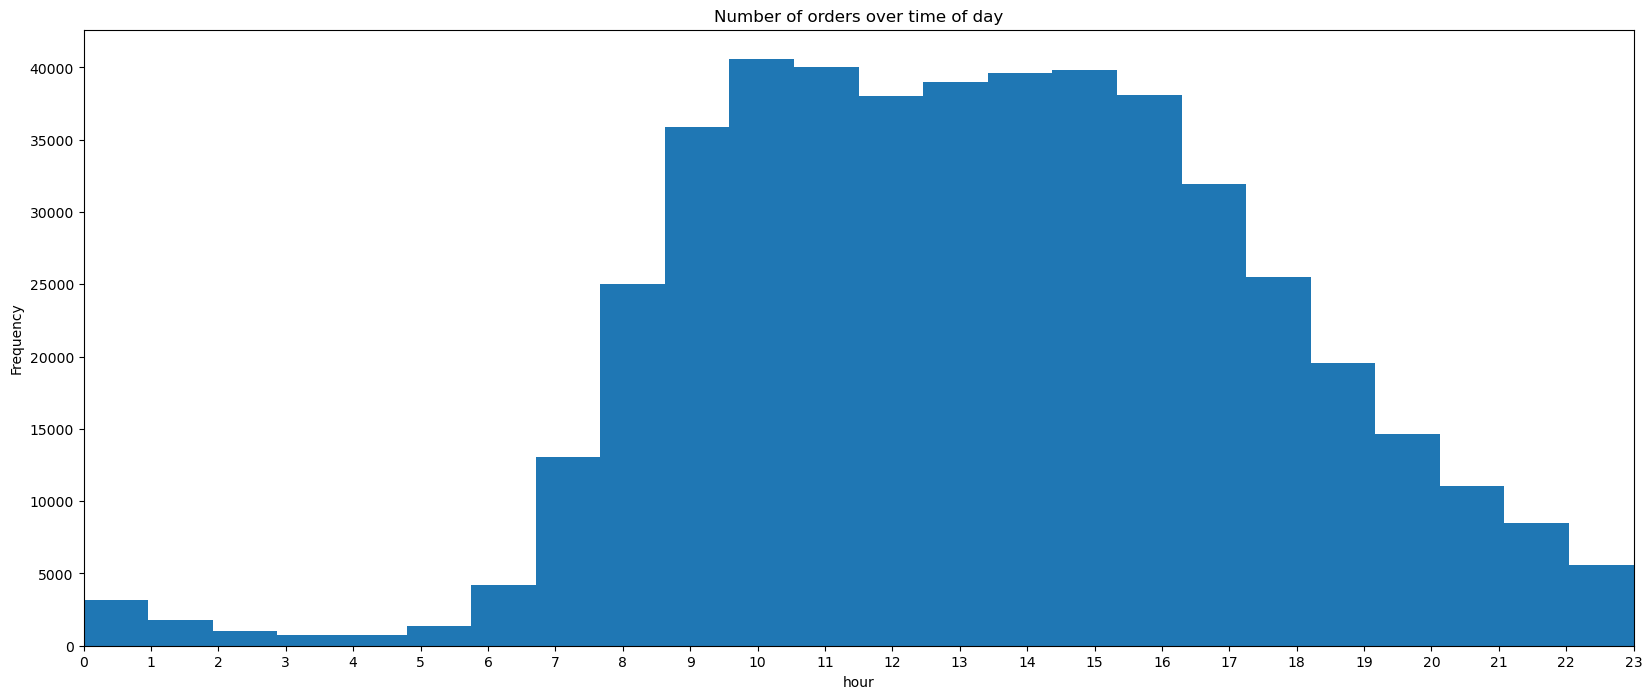

In [135]:
orders['order_hour_of_day'].plot(kind='hist',
                                 bins=24,
                                 figsize=(20,8),
                                 title = 'Number of orders over time of day',
                                 xlim=(0,23),
                                 xticks=range(0,24)
                                )
plt.xlabel('hour')
plt.show()

#### The result of the block
The majority of orders are placed between 9 and 17 o'clock

### [A3] What day of the week do people shop for groceries?

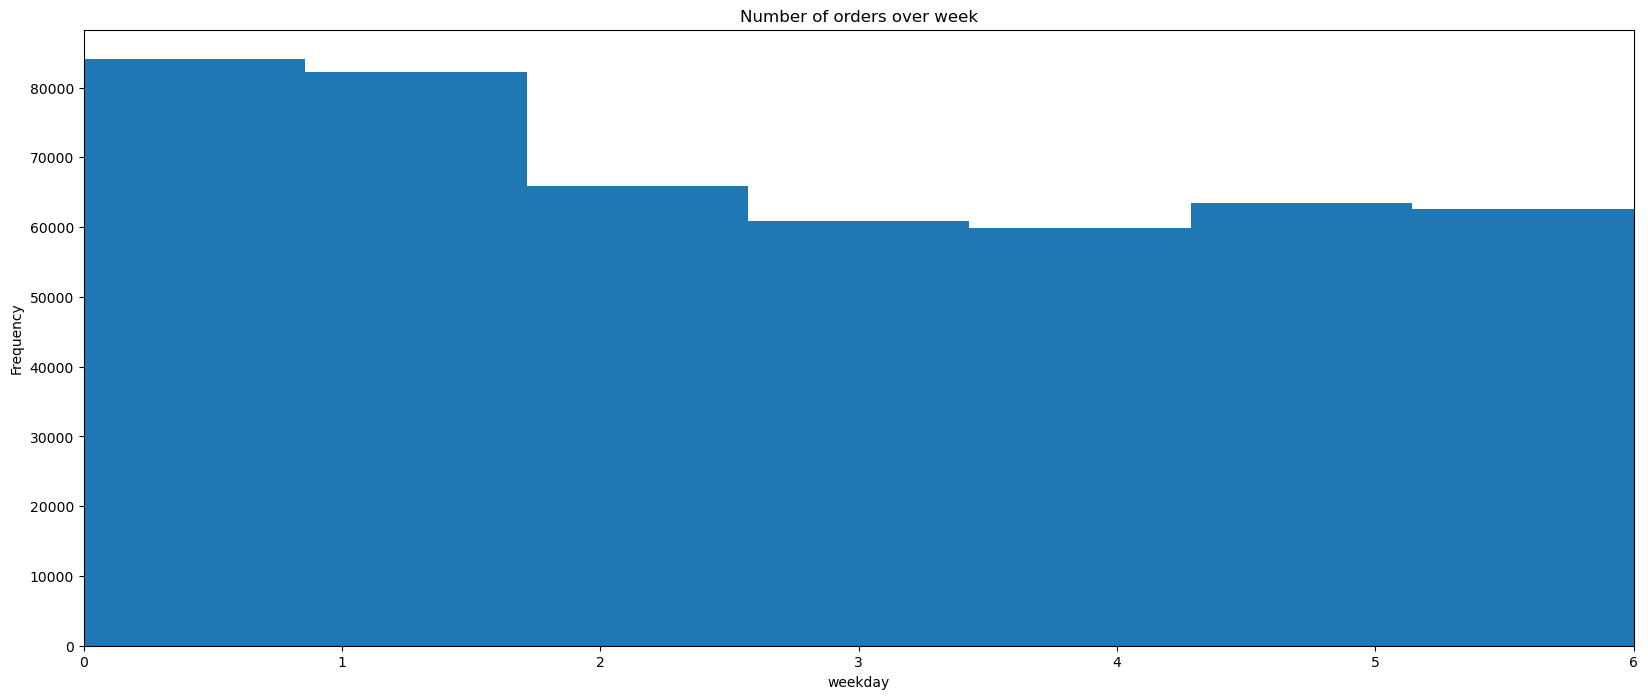

In [136]:
orders['order_dow'].plot(kind='hist',
                                 bins=7,
                                 figsize=(20,8),
                                 title = 'Number of orders over week',
                                 xlim=(0,6),
                                 xlabel = 'weekday',
                                 xticks=range(0,7)
                                )
plt.xlabel('weekday')
plt.show()

#### The result of the block
Users are most active in the 2 first days of the week. And later activity is stable.

### [A4] How long do people wait until placing another order?

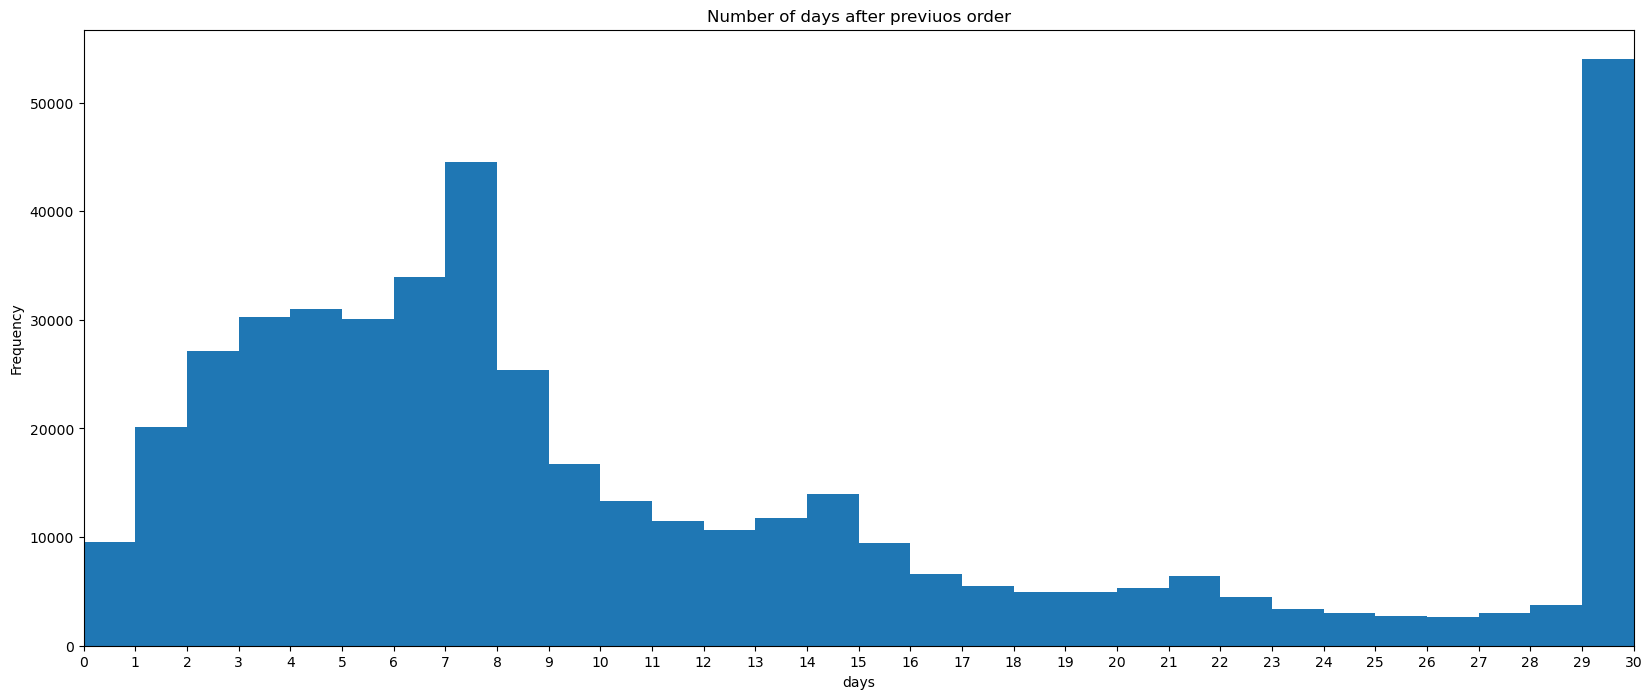

In [137]:
orders['days_since_prior_order'].plot(kind='hist',
                                 bins=30,
                                 figsize=(20,8),
                                 title = 'Number of days after previuos order',
                                 xlim=(0,30),
                                 xticks=range(0,31)
                                )
plt.xlabel('days')
plt.show()

In [138]:
orders['days_since_prior_order'].value_counts(dropna=False)

30.0    51337
7.0     44577
6.0     33930
4.0     31006
3.0     30224
5.0     30096
NaN     28817
2.0     27138
8.0     25361
1.0     20179
9.0     16753
14.0    13992
10.0    13309
13.0    11737
11.0    11467
12.0    10658
0.0      9589
15.0     9416
16.0     6587
21.0     6448
17.0     5498
20.0     5302
18.0     4971
19.0     4939
22.0     4514
28.0     3745
23.0     3337
24.0     3015
27.0     2986
25.0     2711
29.0     2673
26.0     2640
Name: days_since_prior_order, dtype: int64

#### The result of the block
1. Mostly users place orders every week. 
2. We can assume that all orders that had been placed after more than 30 days are grouped under 30 days

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

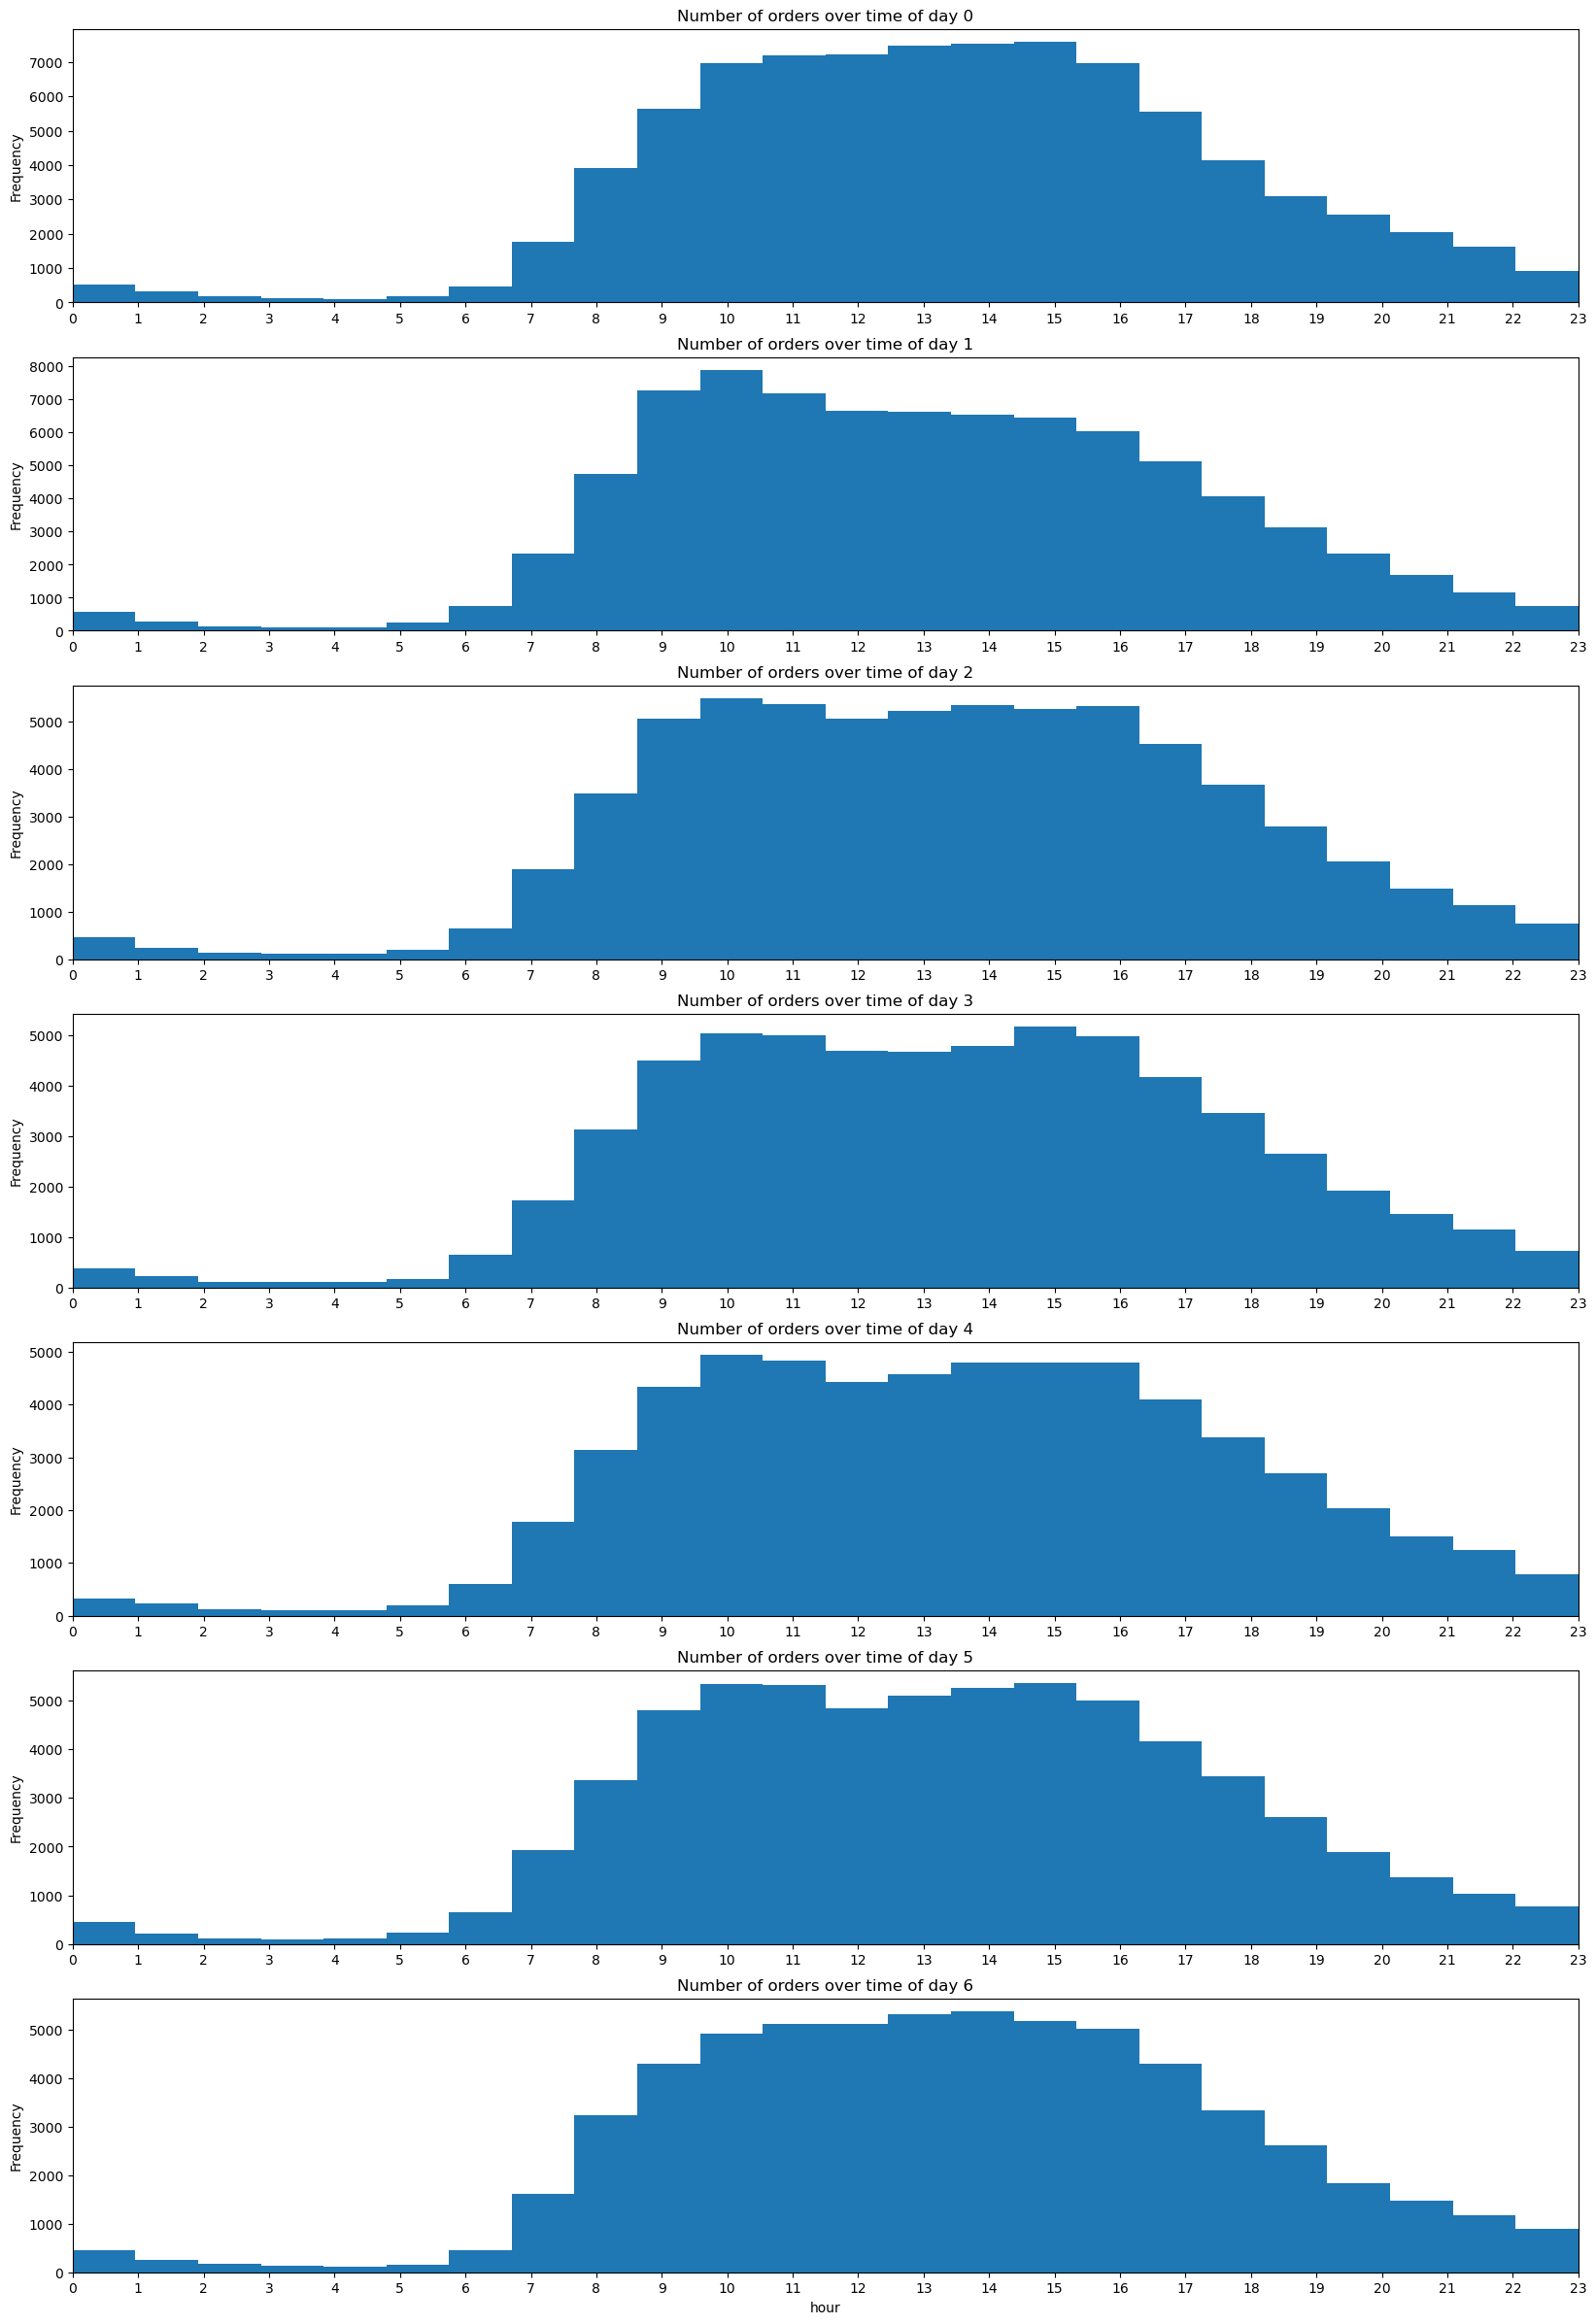

In [139]:
fig, axes = plt.subplots(nrows=7, ncols=1)

dow = sorted(list(orders['order_dow'].unique()))

for i, val in enumerate(dow):
    orders[orders['order_dow'] == val]['order_hour_of_day'].plot(kind='hist',
                                 bins=24,
                                 # density = True,
                                 figsize=(20,30),
                                 ax = axes[i],
                                 title = 'Number of orders over time of day ' + str(val),
                                 xlim=(0,23),
                                 xticks=range(0,24)
                                )
plt.xlabel('hour')
plt.show()

#### The result of the block
1. Distributions for all days are pretty similar
2. Based on distributions we can assume day 0 and day 6 are weekend days as they differs a little bit from days 1-5 which are workdays. If so day 3 is for Wednesdays and day 6 for Saturdays.
3. If so, on Wednesdays people order more around 10-11 and 15-16 o'clock and on Saturdays on the contrary more orders are placed between 11 and 15 o'clock. But the difference is pretty small.

### [B2] What's the distribution for the number of orders per customer?

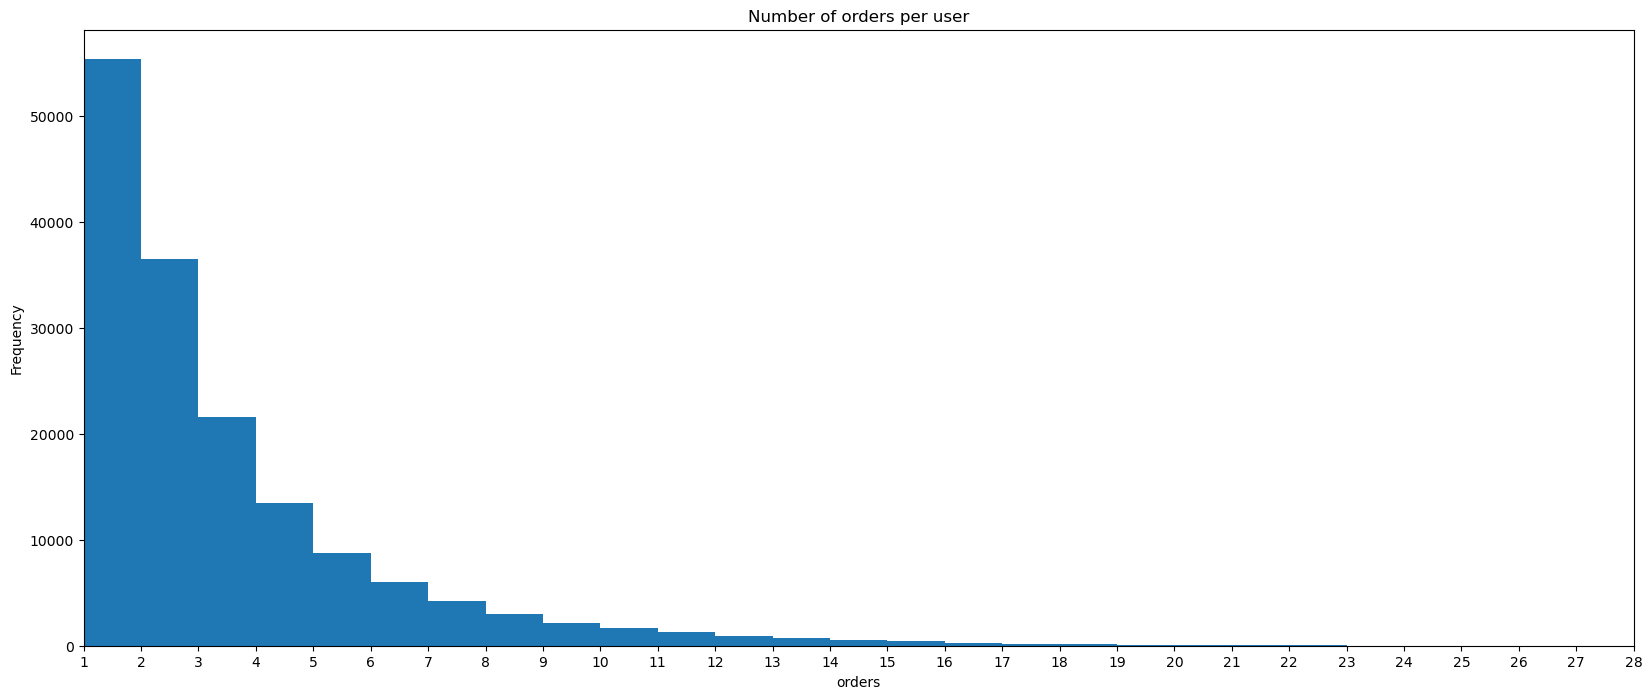

In [140]:
orders_per_user = orders.groupby('user_id')['order_id'].nunique()

max_orders_per_user = orders_per_user.max()

orders_per_user.plot(kind='hist',
                                 bins=range(1,max_orders_per_user+1),
                                 # density = True,
                                 figsize=(20,8),
                                 title = 'Number of orders per user',
                                 xlim=(1,max_orders_per_user),
                                 xticks=range(1,max_orders_per_user+1)
                                )
plt.xlabel('orders')
plt.show()

In [141]:
orders_per_user.describe(percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    157437.000000
mean          3.042182
std           2.746842
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
90%           6.000000
95%           9.000000
99%          14.000000
max          28.000000
Name: order_id, dtype: float64

#### The result of the block
1. The number of orders per customer varies from 1 to 28 orders
2. The average number orders per customer equals to 3, and the median is 2.
3. 90% of customers order no more than 6 orders.

### [B3] What are the top 20 popular products (display their id and name)?

In [142]:
order_products_gpb_product = order_products.groupby('product_id').agg(number_of_orders = ('order_id', 'count'))
top20_products = order_products_gpb_product.sort_values(by='number_of_orders', ascending=False)[:20]
names_all = top20_products.merge(products[['product_id', 'product_name']], on = 'product_id')
names_all

,product_id,number_of_orders,product_name
0,24852,66050,Banana
1,13176,53297,Bag of Organic Bananas
2,21137,37039,Organic Strawberries
3,21903,33971,Organic Baby Spinach
4,47209,29773,Organic Hass Avocado
5,47766,24689,Organic Avocado
6,47626,21495,Large Lemon
7,16797,20018,Strawberries
8,26209,19690,Limes
9,27845,19600,Organic Whole Milk


In [143]:
# share of organic products among all products
print('Share of organic products among all products: {:.1%}'.format(len(products[products['product_name'].str.contains('[oO]rganic')]) / len(products)))

Share of organic products among all products: 9.8%


#### The result of the block

Organic product are quite popular. Almost every product of Top20 is 'organic' whereas in general only 10% of products are organic

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

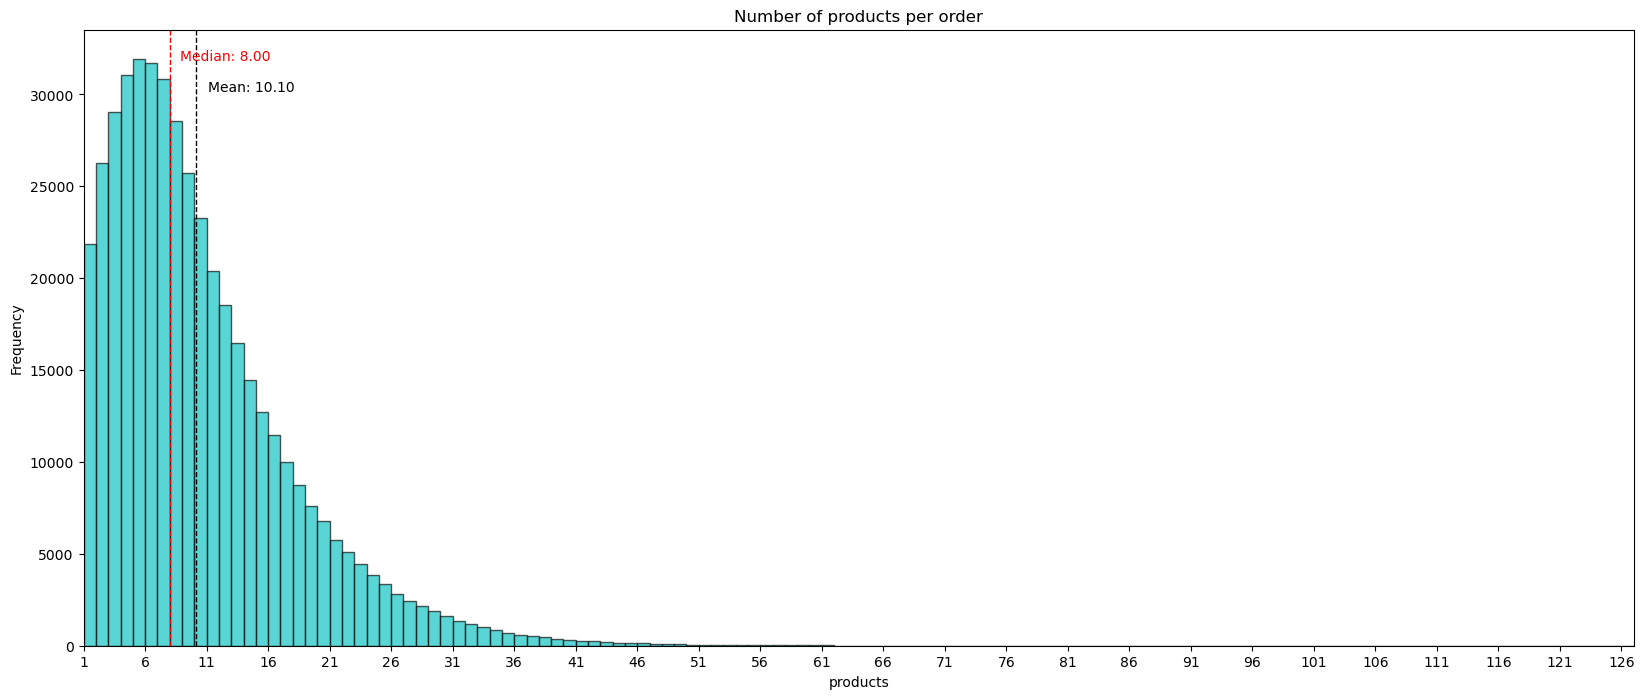

In [144]:
order_products_gpb_order = order_products.groupby('order_id').agg(number_of_products = ('product_id', 'count'))['number_of_products']

max_products_per_order = order_products_gpb_order.max()

order_products_gpb_order.plot(kind='hist',
                                 bins=range(1,max_products_per_order+1),
                                 # density = True,
                                 figsize=(20,8),
                                 title = 'Number of products per order',
                                 xlim=(1,max_products_per_order),
                                 xticks=range(1, max_products_per_order+1, int((max_products_per_order / 25))),
                                 color='c', edgecolor='k', alpha=0.65
                                )

plt.xlabel('products')
plt.axvline(order_products_gpb_order.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(order_products_gpb_order.mean()*1.1,
         max_ylim*0.9, 'Mean: {:.2f}'.format(order_products_gpb_order.mean()))

plt.axvline(order_products_gpb_order.median(), color='r', linestyle='dashed', linewidth=1)
plt.text(order_products_gpb_order.median()*1.1,
         max_ylim*0.95, 'Median: {:.2f}'.format(order_products_gpb_order.median()) ,color='r')
plt.show()

In [145]:
order_products_gpb_order.describe(percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
90%          20.000000
95%          25.000000
99%          35.000000
max         127.000000
Name: number_of_products, dtype: float64

#### The result of the block
1. The number of products per order varies from 1 to 127
2. The average number products per order equals to 10, and the median is 8.
3. 90% of orders include no more than 20 products.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [146]:
order_products_gpb_reordered_product = \
    order_products[order_products['reordered']].groupby('product_id').agg(number_of_orders = ('order_id', 'count'))
top20_reordered_products = order_products_gpb_reordered_product.sort_values(by='number_of_orders', ascending=False)[:20]
names_reordered = top20_reordered_products.merge(products[['product_id', 'product_name']], on = 'product_id')
names_reordered

,product_id,number_of_orders,product_name
0,24852,55763,Banana
1,13176,44450,Bag of Organic Bananas
2,21137,28639,Organic Strawberries
3,21903,26233,Organic Baby Spinach
4,47209,23629,Organic Hass Avocado
5,47766,18743,Organic Avocado
6,27845,16251,Organic Whole Milk
7,47626,15044,Large Lemon
8,27966,14748,Organic Raspberries
9,16797,13945,Strawberries


In [147]:
#differnce with the most popular products 1
names_all['product_name'].compare(names_reordered['product_name'], keep_shape=True, keep_equal=False)

,self,other
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,Large Lemon,Organic Whole Milk
7,Strawberries,Large Lemon
8,Limes,Organic Raspberries
9,Organic Whole Milk,Strawberries


In [148]:
#differnce with the most popular products 2 - intersection
matches = set(names_all['product_name']).intersection(names_reordered['product_name'])
display(len(matches))
matches

19

{'Apple Honeycrisp Organic',
 'Bag of Organic Bananas',
 'Banana',
 'Cucumber Kirby',
 'Large Lemon',
 'Limes',
 'Organic Avocado',
 'Organic Baby Spinach',
 'Organic Blueberries',
 'Organic Fuji Apple',
 'Organic Garlic',
 'Organic Hass Avocado',
 'Organic Lemon',
 'Organic Raspberries',
 'Organic Strawberries',
 'Organic Whole Milk',
 'Organic Yellow Onion',
 'Organic Zucchini',
 'Strawberries'}

In [149]:
#differnce with the most popular products 2 - difference
diffs = set(names_all['product_name']).symmetric_difference(names_reordered['product_name']) 
display(len(diffs))
diffs

2

{'Organic Grape Tomatoes', 'Organic Half & Half'}

#### The result of the block
1. Reordered products are pretty much the same as the most popular products. That makes sense.
2. Only the 20th position is completely different ('Organic Grape Tomatoes' vs.'Organic Half & Half')
3. Other 19 products are the same and even their ranks are almost the same.

### [C3] For each product, what proportion of its orders are reorders?

In [150]:
order_products_gpb_product = order_products.groupby('product_id').agg(number_of_orders = ('order_id', 'count'),
                                                                     number_reordered = ('reordered', 'sum'))
order_products_gpb_product['share_reordered'] = order_products_gpb_product['number_reordered'] / order_products_gpb_product['number_of_orders']
order_products_gpb_product.sort_values(by='share_reordered', ascending=False).merge(products[['product_id', 'product_name']], on = 'product_id')

,product_id,number_of_orders,number_reordered,share_reordered,product_name
0,13282,1,1,1.0,Multigrain Wraps
1,21891,1,1,1.0,Organic Carrots Baby Food
2,21718,1,1,1.0,Calendula Gel Homeopathic Medicine First Aid
3,41017,1,1,1.0,Vegetarian Falafel Mix
4,41015,1,1,1.0,Italian Green Beans
...,...,...,...,...,...
45472,6840,1,0,0.0,Mini Lint Roller
45473,30634,2,0,0.0,Riserva Porcini Mushrooms & White Truffle Oil
45474,6842,2,0,0.0,Organic Alaria Wild Atlantic Wakame
45475,30631,1,0,0.0,Red Enchilada Sauce Mix


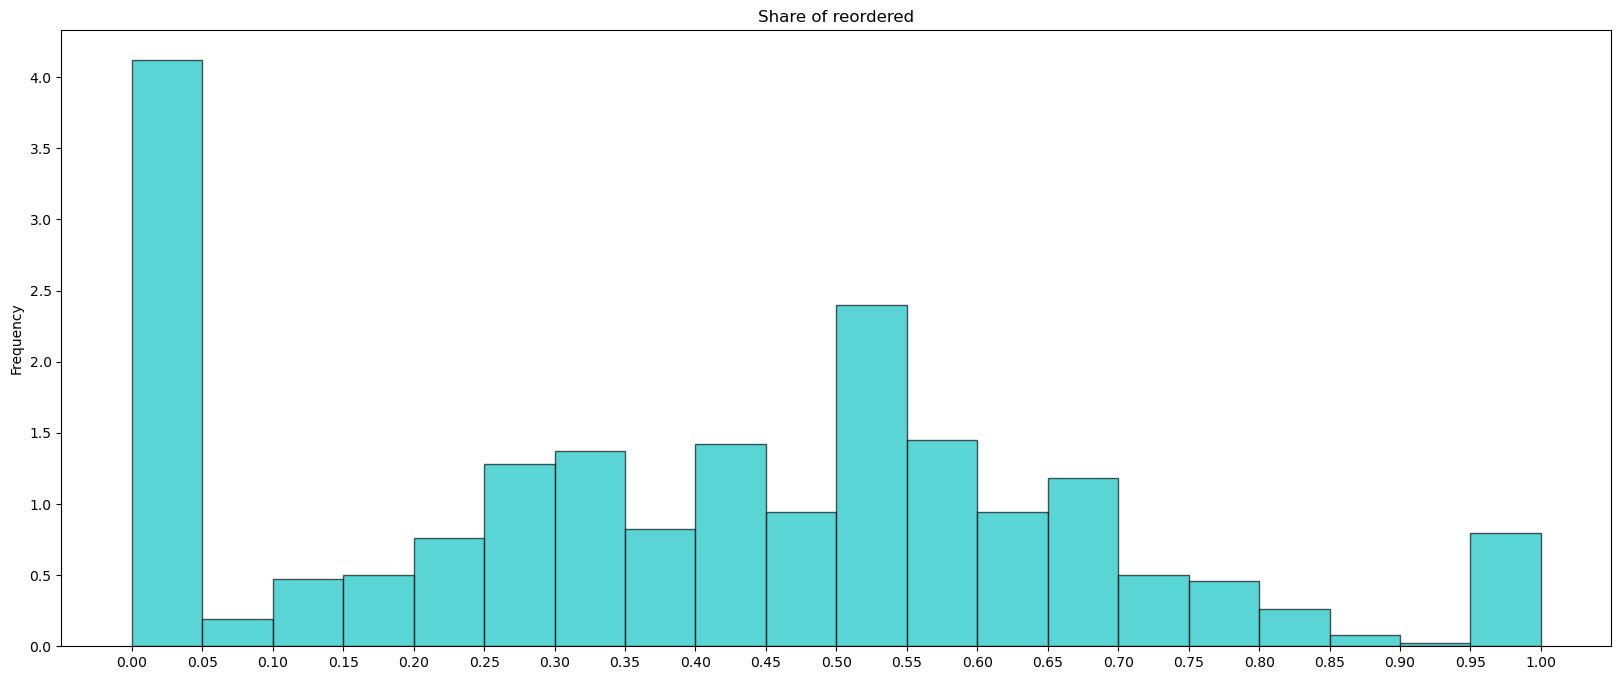

In [151]:
order_products_gpb_product['share_reordered'].plot(kind='hist',
                                 bins=20,
                                 density = True,
                                 figsize=(20,8),
                                 title = 'Share of reordered',
                                 #xlim=(0, 1),
                                 xticks=[x / 20 for x in range(0, 21, 1)],
                                 color='c', edgecolor='k', alpha=0.65
                                )

plt.show()

In [152]:
print('Averege share of reordered products: {:.0%}'.format(
    sum(order_products_gpb_product['number_reordered']) / sum(order_products_gpb_product['number_of_orders'])))

print('Share of never reordered products: {:.0%}'.format(sum(order_products_gpb_product['share_reordered']==0) / len(order_products_gpb_product)))
print('Share of only reordered products: {:.0%}'.format(sum(order_products_gpb_product['share_reordered']==1) / len(order_products_gpb_product)))

Averege share of reordered products: 59%
Share of never reordered products: 20%
Share of only reordered products: 4%


#### The result of the block:
1. On average 59% of ordered products are reorders
2. About 20% of products are never reordered
3. About 4% of product orders are only reorders, that does not make sense. Probably this is result of sampling original dataset.

### [C4] For each customer, what proportion of their products ordered are reorders?

In [153]:
order_products_users = order_products.merge(orders[['order_id', 'user_id']], on='order_id')
order_products_users_gpb = order_products_users.groupby('user_id').agg(number_of_products = ('product_id', 'count'),
                                                                     number_reordered = ('reordered', 'sum'),
                                                                      number_of_orders = ('order_id', 'nunique'))
order_products_users_gpb['share_reordered'] = order_products_users_gpb['number_reordered'] / order_products_users_gpb['number_of_products']
order_products_users_gpb['average_order'] = order_products_users_gpb['number_of_products'] / order_products_users_gpb['number_of_orders']
order_products_users_gpb.sort_values(by='share_reordered', ascending=False)

,number_of_products,number_reordered,number_of_orders,share_reordered,average_order
user_id,,,,,
137587,3,3,1,1.0,3.0
173474,2,2,1,1.0,2.0
13918,4,4,1,1.0,4.0
62300,7,7,1,1.0,7.0
62307,1,1,1,1.0,1.0
...,...,...,...,...,...
190953,9,0,1,0.0,9.0
119371,10,0,1,0.0,10.0
63173,4,0,1,0.0,4.0


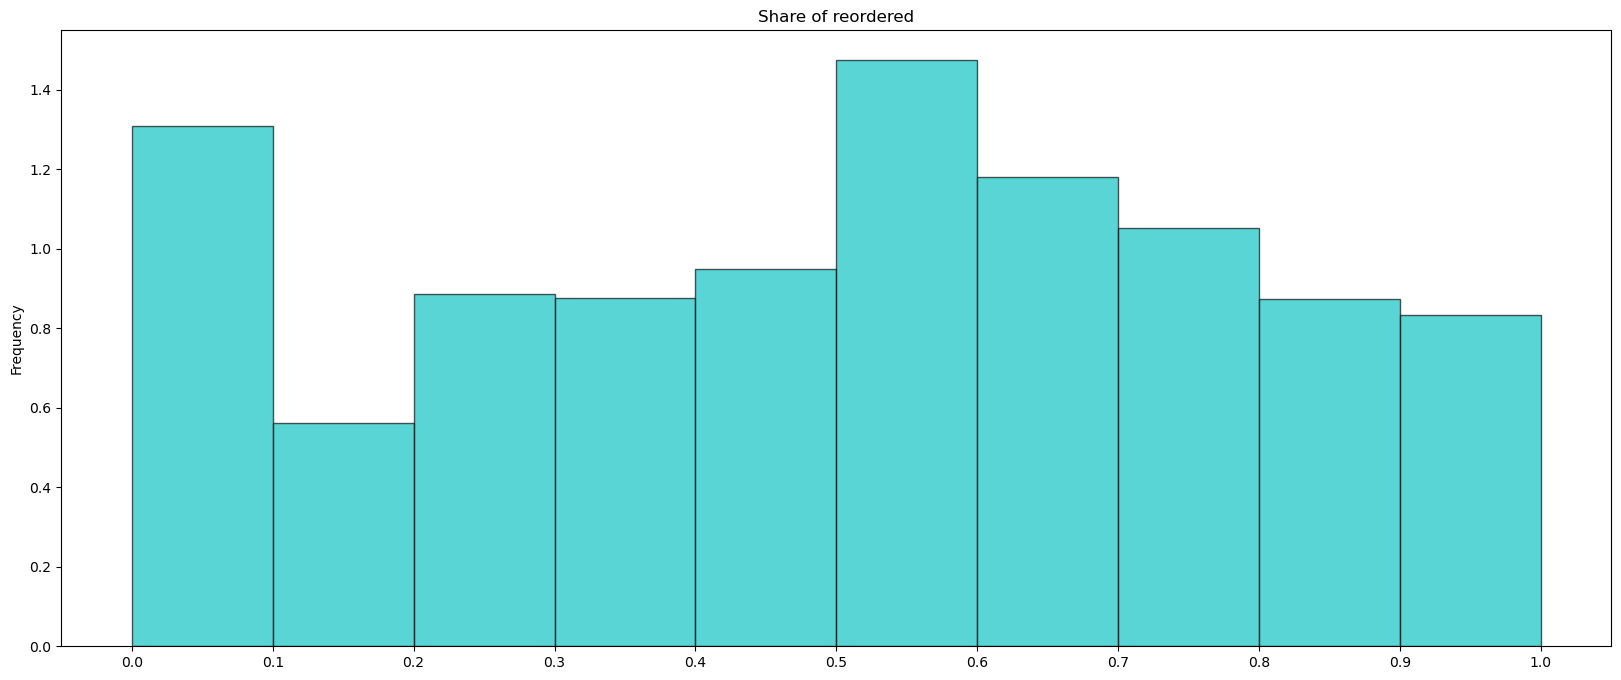

In [154]:
order_products_users_gpb['share_reordered'].plot(kind='hist',
                                 bins=10,
                                 density = True,
                                 figsize=(20,8),
                                 title = 'Share of reordered',
                                 #xlim=(0, 1),
                                 xticks=[x / 10 for x in range(0, 11, 1)],
                                 color='c', edgecolor='k', alpha=0.65
                                )

plt.show()

In [155]:
print('Averege share of reordered products: {:.0%}'.format(
    sum(order_products_users_gpb['number_reordered']) / sum(order_products_users_gpb['number_of_products'])))

print('Share of customers who never reorders products: {:.0%}'.format(sum(order_products_users_gpb['share_reordered']==0) / len(order_products_users_gpb)))
print('Share of customers who always reorders products: {:.0%}'.format(sum(order_products_users_gpb['share_reordered']==1) / len(order_products_users_gpb)))

Averege share of reordered products: 59%
Share of customers who never reorders products: 11%
Share of customers who always reorders products: 5%


In [156]:
order_products_users_gpb['share_reordered'].describe(percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    149626.000000
mean          0.494853
std           0.292685
min           0.000000
25%           0.272727
50%           0.500000
75%           0.724138
90%           0.875000
95%           1.000000
99%           1.000000
max           1.000000
Name: share_reordered, dtype: float64

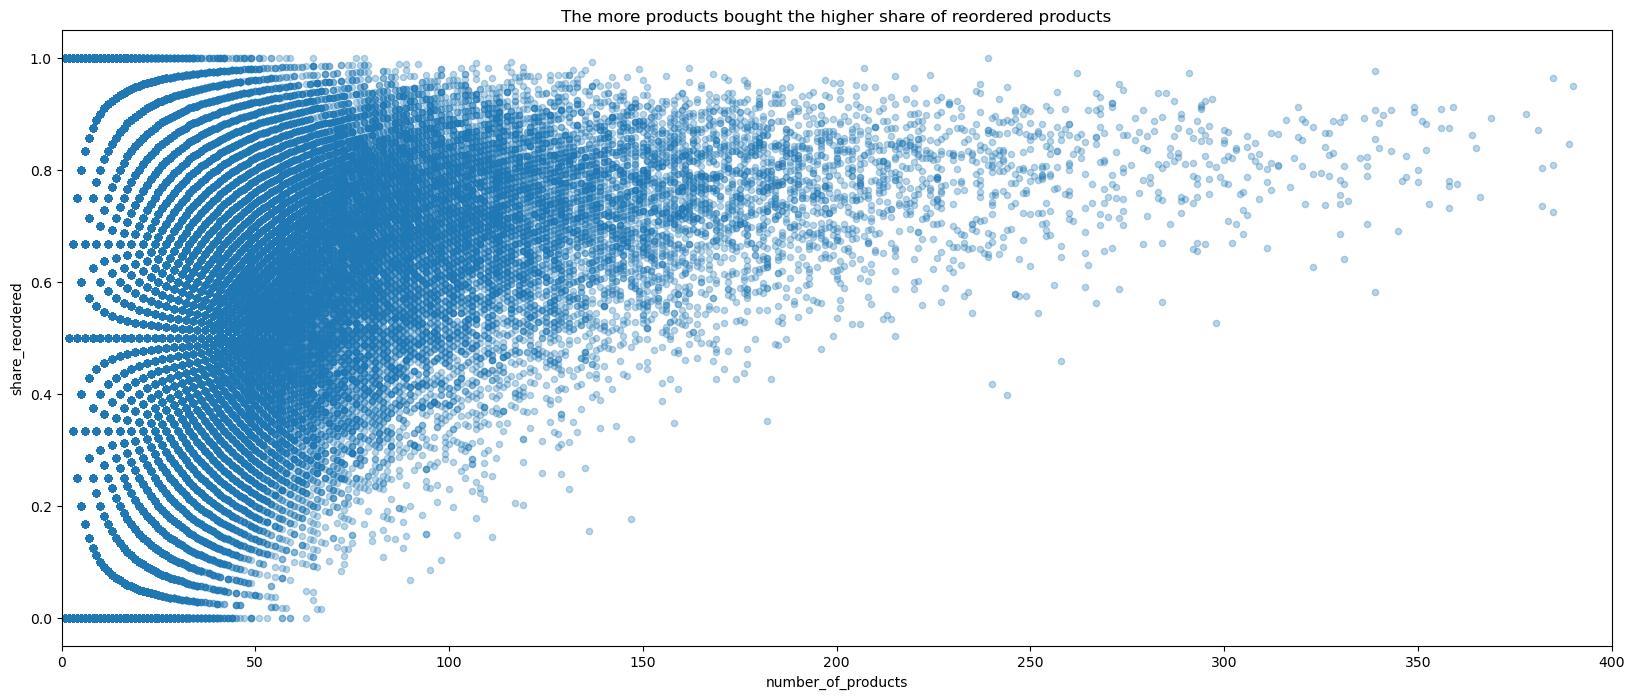

In [157]:
order_products_users_gpb.plot(x='number_of_products', y='share_reordered',
                              kind='scatter',
                              figsize=(20,8),
                              xlim=(0, 400),
                              title = 'The more products bought the higher share of reordered products',
                              alpha = 0.3
                             )
plt.show()

<div class="alert alert-info">
    
This one and the one below are just for fun. To look if there are some patterns in data. We can expect that the more a customer orders the higher the share of reordered products is. 

Moreover, i believe that sampling from original population for this project resulted somehow in these obvious lines that appear in the charts. Otherwise, scatter chart whould be more random.

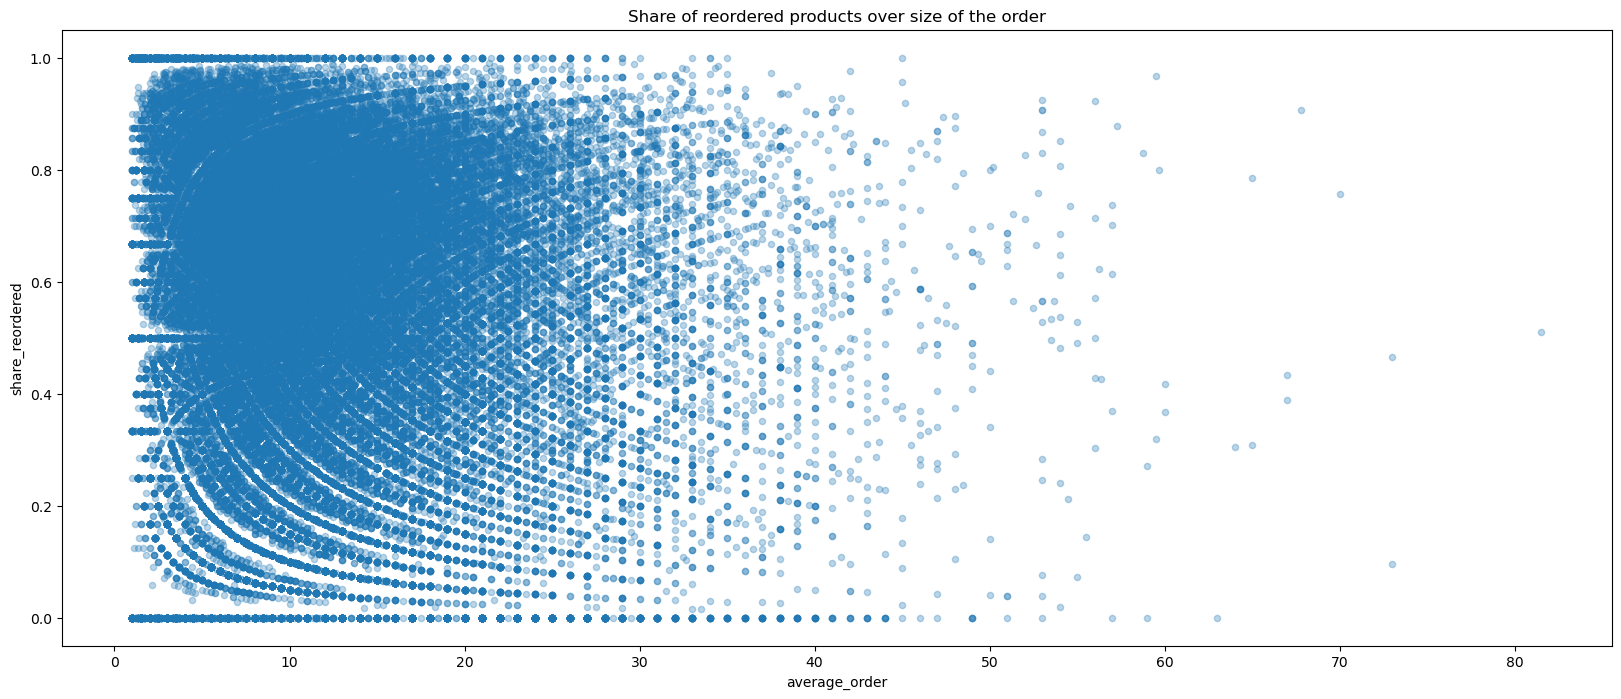

In [158]:
order_products_users_gpb.plot(x='average_order', y='share_reordered',
                              kind='scatter',
                              figsize=(20,8),
                              #xlim=(0, 400),
                              title = 'Share of reordered products over size of the order',
                              alpha = 0.3
                             )
plt.show()

#### The result of the block
1. Again on average 59% of products are reordered.
2. In terms of clients, mean and median are pretty close. So an average customer has about half of his order as reordered products
3. Based on items (1) and (2) and the chart above the more customer buys overall the higher the share of reordered products is. But this link is much weaker as per average size of an order per customer
4. Patterns on the charts above show intresting rules how the dataset was sampled from the original population

### [C5] What are the top 20 items that people put in their carts first? 

I am not sure what is meant here:
* either to rank from 1 to 20 the first product to be added to order
* or to filter top 20 products (i.e. that has `0 < 'add_to_cart_order' <= 20`) and rank them

I will do the first option. The second one is pretty similar

In [159]:
first_products = order_products[order_products['add_to_cart_order'] == 1].groupby('product_id').agg(number_time_first = ('product_id', 'count'))
top20_first_products = first_products.sort_values(by='number_time_first', ascending=False)[:20].merge(products[['product_id', 'product_name']], on = 'product_id')
top20_first_products

,product_id,number_time_first,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado
5,21903,3336,Organic Baby Spinach
6,47766,3044,Organic Avocado
7,19660,2336,Spring Water
8,16797,2308,Strawberries
9,27966,2024,Organic Raspberries


In [160]:
#differnce with the most popular products 1
names_all['product_name'].compare(top20_first_products['product_name'], keep_shape=True, keep_equal=False)

,self,other
0,NaN,NaN
1,NaN,NaN
2,Organic Strawberries,Organic Whole Milk
3,Organic Baby Spinach,Organic Strawberries
4,NaN,NaN
5,Organic Avocado,Organic Baby Spinach
6,Large Lemon,Organic Avocado
7,Strawberries,Spring Water
8,Limes,Strawberries
9,Organic Whole Milk,Organic Raspberries


In [161]:
#differnce with the most popular products 2 - intersection
matches2 = set(names_all['product_name']).intersection(top20_first_products['product_name'])
display(len(matches2))
matches2

12

{'Bag of Organic Bananas',
 'Banana',
 'Large Lemon',
 'Limes',
 'Organic Avocado',
 'Organic Baby Spinach',
 'Organic Hass Avocado',
 'Organic Raspberries',
 'Organic Strawberries',
 'Organic Whole Milk',
 'Organic Yellow Onion',
 'Strawberries'}

In [162]:
#differnce with the most popular products 3 - first products
diffs2 = set(top20_first_products['product_name']).difference(names_all['product_name']) 
display(len(diffs2))
diffs2

8

{'Half & Half',
 'Hass Avocados',
 'Organic Half & Half',
 'Organic Reduced Fat 2% Milk',
 'Organic Reduced Fat Milk',
 'Soda',
 'Sparkling Water Grapefruit',
 'Spring Water'}

In [163]:
#differnce with the most popular products 4 - most popular products
diffs3 = set(names_all['product_name']).difference(top20_first_products['product_name']) 
display(len(diffs3))
diffs3

8

{'Apple Honeycrisp Organic',
 'Cucumber Kirby',
 'Organic Blueberries',
 'Organic Fuji Apple',
 'Organic Garlic',
 'Organic Grape Tomatoes',
 'Organic Lemon',
 'Organic Zucchini'}

#### The result of the block
1. 12 products of the most popular products are the same ones that are put first to the cart
2. People more often pick at first some beverages and milk. And then choose other products.

# The main findings

* An average customer places orders weekly
* An average order includes 8-10 products
* 'Organic' products are unproportinately popular
* Beverages and milk are more often of higher importance and can serve as an attractor.